In [1]:
import pandas as pd

reviews = pd.read_csv("reviews.csv", encoding="utf-8",
                  names=["place", "review_date", "reviewer_country", "title","content","visit_date","review_rating"])

reviews.head()


,place,review_date,reviewer_country,title,content,visit_date,review_rating
0,Chinatown Heritage Centre (Singapore),2/6/2021,"Singapore, Singapore",Great stopover,This place has great information about the are...,1/6/2021,5
1,Chinatown Heritage Centre (Singapore),3/11/2020,"Bensalem, PA",Great History Lesson,Well worth the stop. Great history lesson of t...,1/1/2020,5
2,Chinatown Heritage Centre (Singapore),4/10/2020,"Ellon, UK",good,very well organized well worth a visit. Inform...,1/2/2020,5
3,Chinatown Heritage Centre (Singapore),1/8/2020,"Edinburgh, UK",Brilliant,one of the best destination visitor centres in...,1/7/2020,5
4,Chinatown Heritage Centre (Singapore),6/6/2020,"Cairns, Australia",Cultural Time Capsule,This place is wonderful.\n\nI bought my ticket...,1/11/2019,5


In [2]:
# check data type

# string changed to datetime 
reviews['review_date'] = pd.to_datetime(reviews['review_date'])

reviews['visit_date'] = pd.to_datetime(reviews['visit_date'])

print(type(reviews.iloc[0]["review_date"]))
print(type(reviews.iloc[0]["visit_date"]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [3]:
# title and content combined for easier analysis
reviews['review_date'] = pd.to_datetime(reviews['review_date'])

reviews["review_content"] = reviews["title"] + " " +reviews["content"]

reviews.drop(columns=["title","content"],inplace=True)


In [4]:
reviews.head()

,place,review_date,reviewer_country,visit_date,review_rating,review_content
0,Chinatown Heritage Centre (Singapore),2021-02-06,"Singapore, Singapore",2021-01-06,5,Great stopover This place has great informatio...
1,Chinatown Heritage Centre (Singapore),2020-03-11,"Bensalem, PA",2020-01-01,5,Great History Lesson Well worth the stop. Grea...
2,Chinatown Heritage Centre (Singapore),2020-04-10,"Ellon, UK",2020-01-02,5,good very well organized well worth a visit. I...
3,Chinatown Heritage Centre (Singapore),2020-01-08,"Edinburgh, UK",2020-01-07,5,Brilliant one of the best destination visitor ...
4,Chinatown Heritage Centre (Singapore),2020-06-06,"Cairns, Australia",2019-01-11,5,Cultural Time Capsule This place is wonderful....


In [5]:
# check for null values

reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66447 entries, 0 to 66446
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   place             66447 non-null  object        
 1   review_date       66447 non-null  datetime64[ns]
 2   reviewer_country  58564 non-null  object        
 3   visit_date        64697 non-null  datetime64[ns]
 4   review_rating     66447 non-null  int64         
 5   review_content    66447 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 3.0+ MB


In [6]:
# look at rows with null values

reviews_all_null = reviews[reviews.isna().any(axis=1)]
reviews_visit_null = reviews[reviews["visit_date"].isna()]
reviews_country_null = reviews[reviews["reviewer_country"].isna()]

print(len(reviews_country_null.index))
print(len(reviews_visit_null.index))
print(len(reviews_all_null.index))

7883
1750
9429


In [7]:
reviews = reviews.dropna()
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57018 entries, 0 to 66446
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   place             57018 non-null  object        
 1   review_date       57018 non-null  datetime64[ns]
 2   reviewer_country  57018 non-null  object        
 3   visit_date        57018 non-null  datetime64[ns]
 4   review_rating     57018 non-null  int64         
 5   review_content    57018 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 3.0+ MB


In [8]:
# clean review_content
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# library requirements
nltk.download('punkt')
nltk.download('stopwords')

# remove white spaces or paragraphs new lines
reviews['review_content_clean'] = reviews['review_content'].apply(lambda x: re.sub("\s+"," ", x))

reviews.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Shawn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shawn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,place,review_date,reviewer_country,visit_date,review_rating,review_content,review_content_clean
0,Chinatown Heritage Centre (Singapore),2021-02-06,"Singapore, Singapore",2021-01-06,5,Great stopover This place has great informatio...,Great stopover This place has great informatio...
1,Chinatown Heritage Centre (Singapore),2020-03-11,"Bensalem, PA",2020-01-01,5,Great History Lesson Well worth the stop. Grea...,Great History Lesson Well worth the stop. Grea...
2,Chinatown Heritage Centre (Singapore),2020-04-10,"Ellon, UK",2020-01-02,5,good very well organized well worth a visit. I...,good very well organized well worth a visit. I...
3,Chinatown Heritage Centre (Singapore),2020-01-08,"Edinburgh, UK",2020-01-07,5,Brilliant one of the best destination visitor ...,Brilliant one of the best destination visitor ...
4,Chinatown Heritage Centre (Singapore),2020-06-06,"Cairns, Australia",2019-01-11,5,Cultural Time Capsule This place is wonderful....,Cultural Time Capsule This place is wonderful....


In [9]:
uniqueplace = []
for index, rows in reviews.iterrows():
    placelist = rows["place"].split()
    for placeword in placelist:
        if placeword not in uniqueplace:
            uniqueplace.append(placeword)
            
print(uniqueplace)

stop_words_placename = []
trash = []
for unique in uniqueplace:
    if "," in unique:
        unique = unique.replace(",","")
    if "(" in unique:
        unique = unique.replace("(","")
    if ")" in unique:
        unique = unique.replace(")","")    
    if unique.isalpha():
        stop_words_placename.append(unique.lower())
    else:
        trash.append(unique)

print()
print(stop_words_placename)
print()
print(trash)


['Chinatown', 'Heritage', 'Centre', '(Singapore)', 'Thian', 'Hock', 'Keng', 'Temple,', 'Singapore', 'Eurasian', 'Gallery', 'The', 'Pinnacle', '@', 'Duxton', 'Hajjah', 'Fatimah', 'Mosque,', 'Haw', 'Par', 'Villa', 'NUS', 'Baba', 'House', 'Hong', 'San', 'See', 'Esplanade', 'Gardens', 'by', 'the', 'Bay', 'Old', 'Supreme', 'Court', 'Building,', 'Lau', 'Pa', 'Sat', 'Festival', 'Pavilion', 'Malay', 'Peranakan', 'Museum', 'Raffles', 'City', 'Gillman', 'Barracks', 'National', 'of', 'Japanese', 'Cemetery', 'Park,', 'Dalhousie', 'Obelisk', 'Statue', 'Philatelic', 'Lim', 'Bo', 'Seng', 'Memorial,', 'Kranji', 'War', 'Indian', 'Army', 'Monument', 'Reflections', 'at', 'Bukit', 'Chandu', 'Cenotaph', 'Civilian', 'Sri', 'Veeramakaliamman', 'Sultan', 'Mariamman', 'Armenian', 'Church,', 'Chijmes', 'St', "Andrew's", 'Cathedral,', 'ArtScience', 'Marina', 'Sands', 'Former', 'Ford', 'Factory', 'Coins', 'And', 'Notes', 'Mint', 'Toys', 'Chinese', 'Kampong', 'Glam', 'Red', 'Dot', 'Design', 'Art', 'Victoria', 'The

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



<Figure size 1440x720 with 0 Axes>

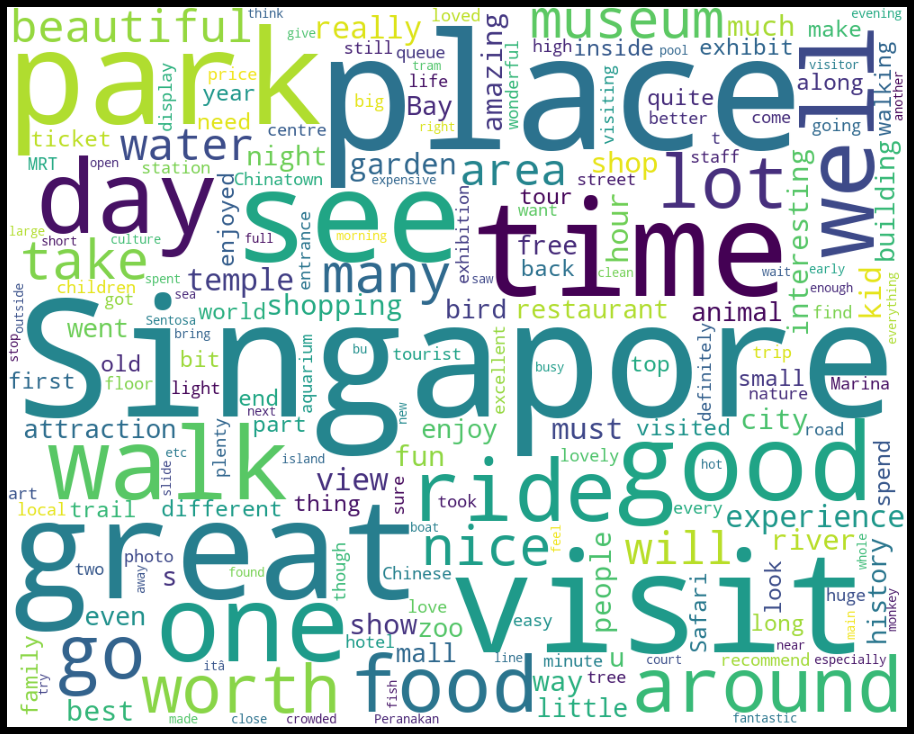

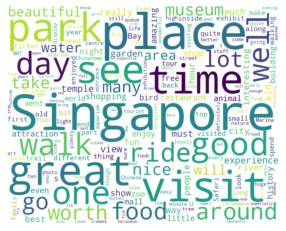

In [10]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

word_cloud_text = ''
for index, rows in reviews.iterrows():
    word_cloud_text += rows['review_content_clean']
    
print(word_cloud_text)

wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white", width=1000, height=800,collocations=False).generate(word_cloud_text)
plt.figure( figsize=(20,10) )

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file("Wordcloud_preclean.jpg")

In [11]:
# set stop words
stop_words = stopwords.words('english')
stop_words.extend(['like', 'best', 'new', 'im', 'said', 'hi', 'whats', 'gon ', 'tak', 'didnt', 'till', 'dah', 'na', 'boleh', 'hari', 'let', 'wan', 'youre', 'ke', 'gon', 'shah', ' na', 'la', 'ye', 'Started', 'little', 'end', 'better', 'feel', 'thats', 'bit', 'getting', 'ive', 'got', 'wait', 'di','da', 'che', 'id', 'il','amp','from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come','next','day','year','let','sign','day','uo','still','let','really','first','never','put','uo','give','still','sure','back','uo','really','place','show','aos',"a", "about", "above", "above", "across", "after", "afterwards", "again", "against", "all", "almost", "alone", "along", "already", "also","although","always","am","among", "amongst", "amoungst", "amount",  "an", "and", "another", "any","anyhow","anyone","anything","anyway", "anywhere", "are", "around", "as",  "at", "back","be","became", "because","become","becomes", "becoming", "been", "before", "beforehand", "behind", "being", "below", "beside", "besides", "between", "beyond", "bill", "both", "bottom","but", "by", "call", "can", "cannot", "cant", "co", "con", "could", "couldnt", "cry", "de", "describe", "detail", "do", "done", "down", "due", "during", "each", "eg", "eight", "either", "eleven","else", "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone", "everything", "everywhere", "except", "few", "fifteen", "fify", "fill", "find", "fire", "first", "five", "for", "former", "formerly", "forty", "found", "four", "from", "front", "full", "further", "get", "give", "go", "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter", "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his", "how", "however", "hundred", "ie", "if", "in", "inc", "indeed", "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter", "latterly", "least", "less", "ltd", "made", "many", "may", "me", "meanwhile", "might", "mill", "mine", "more", "moreover", "most", "mostly", "move", "much", "must", "my", "myself", "name", "namely", "neither", "never", "nevertheless", "next", "nine", "no", "nobody", "none", "noone", "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on", "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our", "ours", "ourselves", "out", "over", "own","part", "per", "perhaps", "please", "put", "rather", "re", "same", "see", "seem", "seemed", "seeming", "seems", "serious", "several", "she", "should", "show", "side", "since", "sincere", "six", "sixty", "so", "some", "somehow", "someone", "something", "sometime", "sometimes", "somewhere", "still", "such", "system", "take", "ten", "than", "that", "the", "their", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "therefore", "therein", "thereupon", "these", "they", "thick", "thin", "third", "this", "those", "though", "three", "through", "throughout", "thru", "thus", "to", "together", "too", "top", "toward", "towards", "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us", "very", "via", "was", "we", "well", "were", "what", "whatever", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby", "wherein", "whereupon", "wherever", "whether", "which", "while", "whither", "who", "whoever", "whole", "whom", "whose", "why", "will", "with", "within", "without", "would", "yet", "you", "your", "yours", "yourself", "yourselves", "the",'chinatown', 'heritage', 'centre', 'singapore', 'thian', 'hock', 'keng', 'temple', 'singapore', 'eurasian', 'gallery', 'the', 'pinnacle', 'duxton', 'hajjah', 'fatimah', 'mosque', 'haw', 'par', 'villa', 'nus', 'baba', 'house', 'hong', 'san', 'see', 'esplanade', 'gardens', 'by', 'the', 'bay', 'old', 'supreme', 'court', 'building', 'lau', 'pa', 'sat', 'festival', 'pavilion', 'malay', 'peranakan', 'museum', 'raffles', 'city', 'gillman', 'barracks', 'national', 'of', 'japanese', 'cemetery', 'park', 'dalhousie', 'obelisk', 'statue', 'philatelic', 'lim', 'bo', 'seng', 'memorial', 'kranji', 'war', 'indian', 'army', 'monument', 'reflections', 'at', 'bukit', 'chandu', 'cenotaph', 'civilian', 'sri', 'veeramakaliamman', 'sultan', 'mariamman', 'armenian', 'church', 'chijmes', 'st', 'cathedral', 'artscience', 'marina', 'sands', 'former', 'ford', 'factory', 'coins', 'and', 'notes', 'mint', 'toys', 'chinese', 'kampong', 'glam', 'red', 'dot', 'design', 'art', 'victoria', 'theatre', 'concert', 'hall', 'sun', 'yat', 'sen', 'nanyang', 'memorial', 'hall', 'asian', 'civilisations', 'botanic', 'zoo', 'river', 'safari', 'cable', 'car', 'sentosa', 'sentosa', 'island', 'night', 'pulau', 'ubin', 'nature', 'and', 'walk', 'little', 'india', 'orchard', 'road', 'macritchie', 'trail', 'reservoir', 'harbourfront', 'jamae', 'flyer', 'barrage', 'henderson', 'waves', 'labrador', 'reserve', 'shoppes', 'chek', 'jawa', 'pulau', 'ubin', 'merlion', 'park', 'resorts', 'world', 'sentosa', 'sungei', 'buloh', 'wetland', 'aquarium', 'joo', 'buddha', 'tooth', 'relic', 'temple', 'museum', 'universal', 'studios', 'science', 'fuk', 'tak', 'chi', 'katong', 'antique', 'east', 'coast', 'fort', 'canning', 'kusu', 'island', 'jurong', 'bird', 'hort', 'adventure', 'cove', 'waterpark',"Singapore","visit"])
stop_words = set(stop_words)
print(stop_words)

{'now', 'barracks', 'very', 'end', 'jurong', 'mightn', 'really', 'mine', 'side', "weren't", 'here', 'run', ' na', 'hadn', 'having', 'go', 'give', 'fire', 'ie', "haven't", 'you', 'of', 'coins', 'these', 'getting', 'beforehand', 'because', 'formerly', 'made', 'festival', 'katong', 'mustn', 'ltd', 'mariamman', 'she', 'whither', 'sultan', 'besides', 'per', 'pinnacle', 'cenotaph', 'veeramakaliamman', 'full', 'whats', 'sure', 'villa', 'sri', 'east', 'then', 'due', 'resorts', 'shoppes', 'hasnt', 'during', 'something', 'last', 't', 'de', 'armenian', 'da', 'feel', 'for', 'almost', 'nanyang', 'them', 'whereupon', "that'll", 'cove', 'nobody', 'building', 'twelve', 'nowhere', 'none', 'hock', 'those', 'victoria', 'seem', 'why', 'on', "isn't", 'nor', 'get', 'year', 'forty', 'india', "doesn't", 'better', 'somewhere', 'try', 'ours', 'kampong', 'any', 'everywhere', 'par', 'coast', 'anything', 'first', 'until', 'ford', 'it', 'among', 'good', 'been', 'below', 'ain', 'enough', 'artscience', 'doesn', 'visi

In [12]:
# #  library requirements
# import nltk
# nltk.download('averaged_perceptron_tagger')

In [13]:
tagged_words = []
unique_tagged_words = []
for index, rows in reviews.iterrows():
    review_content = rows['review_content_clean']
    # tokenize
    tokenized_review = word_tokenize(review_content)
    # standardize to lower case
    lower_review = [w.lower() for w in tokenized_review]
    # keep token words which are text
    text_words_only = [w for w in lower_review if re.search('^[a-z]+$',w)]
    # remove token words which are stop words and place names
    text_stopremoved = [w for w in text_words_only if w not in stop_words]

    # pos tagging
    tagged = nltk.pos_tag(text_stopremoved)
    
    for tag in tagged:
        if tag[0] not in unique_tagged_words:
            unique_tagged_words.append(tag[0])
            tagged_words.append(tag)
    # join back into sentence
    text_joined = " ".join(text_stopremoved)
    
    
    # add edited sentence back to dataframe
    reviews.at[index,'review_content_clean'] = text_joined


<Figure size 1440x720 with 0 Axes>

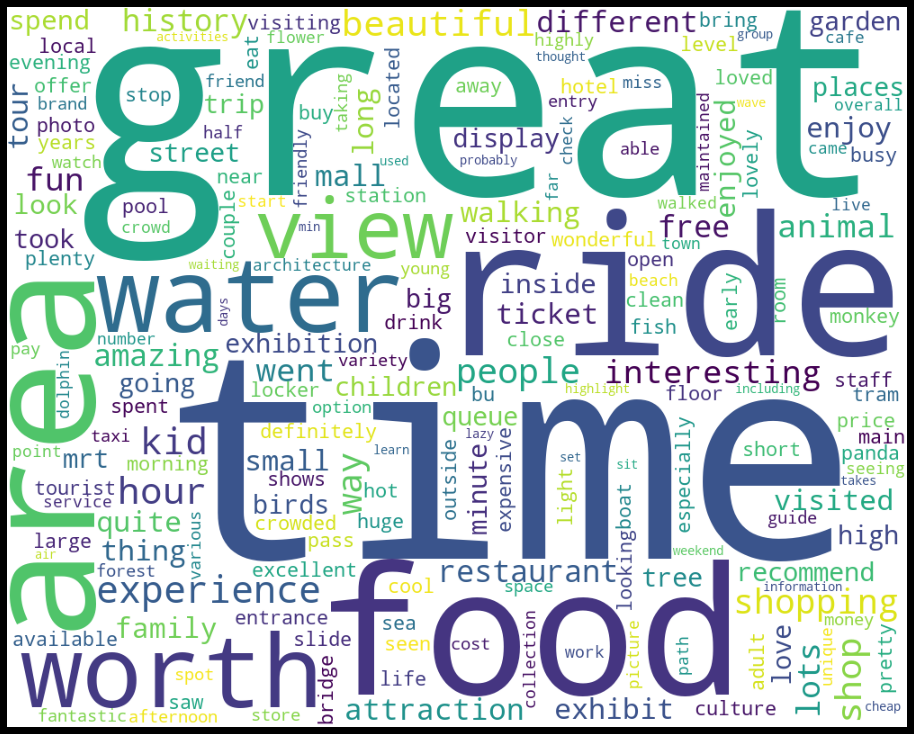

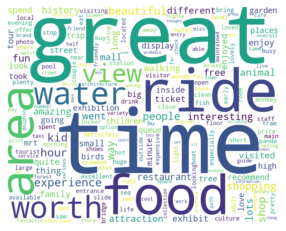

In [23]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

word_cloud_text = ''
for index, rows in reviews.iterrows():
    word_cloud_text += rows['review_content_clean']
    

wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white", width=1000, height=800,collocations=False).generate(word_cloud_text)
plt.figure( figsize=(20,10) )

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file("Wordcloud_postclean.jpg")

In [15]:
reviews.tail()

,place,review_date,reviewer_country,visit_date,review_rating,review_content,review_content_clean
66442,Adventure Cove Waterpark (Sentosa Island),2016-10-24,"Adelaide, Australia",2015-01-12,3,"Decent, but small. Waterpark was decent, but t...",decent small decent slides rides hour lagoon s...
66443,Adventure Cove Waterpark (Sentosa Island),2016-10-23,Australia,2016-01-10,4,Rapids were fun Had entry to Dolphin Island so...,rapids fun entry dolphin popped inflatable wen...
66444,Adventure Cove Waterpark (Sentosa Island),2016-10-23,"Gurugram (Gurgaon), India",2015-01-12,4,Water park Fun filled water park with an aweso...,water fun filled water awesome wave pool needs...
66445,Adventure Cove Waterpark (Sentosa Island),2016-10-19,"Singapore, Singapore",2016-01-10,4,Fun time Adventure Cove is a fun place to hang...,fun time fun hang kids plenty rides things
66446,Adventure Cove Waterpark (Sentosa Island),2016-10-18,"Singapore, Singapore",2016-01-10,5,Excellent water park.. Definitely the best in ...,excellent water definitely asia definitely ter...


In [16]:
print(reviews["review_content_clean"][0])
print()
print(reviews["review_content"][0])

great stopover great information area ventured tourist informative learn

Great stopover This place has great information about the area. Although I've not really ventured a lot as a tourist I found this place very informative and I got to learn something new.


In [17]:
reviews.head()

,place,review_date,reviewer_country,visit_date,review_rating,review_content,review_content_clean
0,Chinatown Heritage Centre (Singapore),2021-02-06,"Singapore, Singapore",2021-01-06,5,Great stopover This place has great informatio...,great stopover great information area ventured...
1,Chinatown Heritage Centre (Singapore),2020-03-11,"Bensalem, PA",2020-01-01,5,Great History Lesson Well worth the stop. Grea...,great history lesson worth stop great history ...
2,Chinatown Heritage Centre (Singapore),2020-04-10,"Ellon, UK",2020-01-02,5,good very well organized well worth a visit. I...,organized worth information interesting especi...
3,Chinatown Heritage Centre (Singapore),2020-01-08,"Edinburgh, UK",2020-01-07,5,Brilliant one of the best destination visitor ...,brilliant destination visitor centres brings h...
4,Chinatown Heritage Centre (Singapore),2020-06-06,"Cairns, Australia",2019-01-11,5,Cultural Time Capsule This place is wonderful....,cultural time capsule wonderful bought ticket ...


In [18]:
# library requirements
# pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


def vader_compound_score(sentence): 
    sid_obj = SentimentIntensityAnalyzer() 
    # returns a dict of polarity score information we only require the "compound"
    sentiment_dict = sid_obj.polarity_scores(sentence)
    return sentiment_dict['compound']

for index,rows in reviews.iterrows():
    vader_score = vader_compound_score(rows['review_content_clean'])
    reviews.at[index,'vader_sent'] = vader_score



In [19]:
reviews.head()



,place,review_date,reviewer_country,visit_date,review_rating,review_content,review_content_clean,vader_sent
0,Chinatown Heritage Centre (Singapore),2021-02-06,"Singapore, Singapore",2021-01-06,5,Great stopover This place has great informatio...,great stopover great information area ventured...,0.8481
1,Chinatown Heritage Centre (Singapore),2020-03-11,"Bensalem, PA",2020-01-01,5,Great History Lesson Well worth the stop. Grea...,great history lesson worth stop great history ...,0.8176
2,Chinatown Heritage Centre (Singapore),2020-04-10,"Ellon, UK",2020-01-02,5,good very well organized well worth a visit. I...,organized worth information interesting especi...,0.5574
3,Chinatown Heritage Centre (Singapore),2020-01-08,"Edinburgh, UK",2020-01-07,5,Brilliant one of the best destination visitor ...,brilliant destination visitor centres brings h...,0.8074
4,Chinatown Heritage Centre (Singapore),2020-06-06,"Cairns, Australia",2019-01-11,5,Cultural Time Capsule This place is wonderful....,cultural time capsule wonderful bought ticket ...,0.9360


In [20]:
reviews.to_csv("review_clean_w_vader.csv",index=False,header=True)

In [21]:
#create pos tags
df = pd.DataFrame({'col':tagged_words})
df.to_csv(index=False)

df = pd.DataFrame({'a':tagged_words})

df2 = pd.DataFrame(df['a'].tolist(), index=df.index)

df2.to_csv("pos_tags.csv", encoding='utf-8',index=False, header=False)

In [22]:
df2

,0,1
0,great,JJ
1,stopover,RB
2,information,NN
3,area,NN
4,ventured,VBD
...,...,...
34316,faciilities,NNS
34317,dophines,NNS
34318,walkie,NN
34319,talkie,NN
